<a href="https://colab.research.google.com/github/nishantkapps/aiml-projects/blob/main/Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Great Learning / Deakin (MDS) Project Submission - Supervised Learning**
<hr>

### **Part A**
> Medical research university X is undergoing a deep research on patients with certain conditions. University has an internal AI team. Due to confidentiality the patient’s details and the conditions are masked by the client by providing different datasets to the AI team for developing a AIML model which can predict the condition of the patient depending on the received test results.

> The data consists of biomechanics features of the patients according to their current conditions. Each patient is represented in the data set by six biomechanics attributes derived from the shape and orientation of the condition to their body part.

**Demonstrate the ability to fetch, process and leverage data to generate useful predictions by training Supervised Learning algorithms.**
<br><br>
<hr>


In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, precision_score, roc_auc_score

<hr>

**Section 1 : Data Understanding: [5 Marks]**
<li>A. Read all the 3 CSV files as DataFrame and store them into 3 separate variables. [1 Mark]
<li>B. Print Shape and columns of all the 3 DataFrames. [1 Mark]
<li>C. Compare Column names of all the 3 DataFrames and clearly write observations. [1 Mark]
<li>D. Print DataTypes of all the 3 DataFrames. [1 Mark]
<li>E. Observe and share variation in ‘Class’ feature of all the 3 DaraFrames. [1 Mark]

<hr>

In [91]:
normal = pd.read_csv('/content/drive/MyDrive/datasets/sl/Part1+-+Normal.csv')
typeh = pd.read_csv('/content/drive/MyDrive/datasets/sl/Part1+-+Type_H.csv')
types = pd.read_csv('/content/drive/MyDrive/datasets/sl/Part1+-+Type_S.csv')

In [92]:
print('--------------------------------------------------------------------')
print('Normal Patients :', normal.shape)
print('Type H Patients :', typeh.shape)
print('Type S Patients :', types.shape)
print('--------------------------------------------------------------------')

--------------------------------------------------------------------
Normal Patients : (100, 7)
Type H Patients : (60, 7)
Type S Patients : (150, 7)
--------------------------------------------------------------------


In [93]:
d = {'Normal':normal.columns, 'Type_H':typeh.columns, 'Type_S':types.columns}
cols = pd.DataFrame(d, columns=['Normal', 'Type_H', 'Type_S']).T
print('--------------------------------------------------------------------')
for i, col in enumerate(cols):
  if cols[i][0] == cols[i][1] :
    if cols[i][1] == cols[i][2] :
      print('Column Name', cols[i][0], 'is same in all files')
print('--------------------------------------------------------------------')

--------------------------------------------------------------------
Column Name P_incidence is same in all files
Column Name P_tilt is same in all files
Column Name L_angle is same in all files
Column Name S_slope is same in all files
Column Name P_radius is same in all files
Column Name S_Degree is same in all files
Column Name Class is same in all files
--------------------------------------------------------------------


In [94]:
print(' -------------------- Normal Patients Data ----------------------- ' )
print(normal.info())
print(' -------------------- Type H Patients Data ----------------------- ' )
print(typeh.info())
print(' -------------------- Type S Patients Data ----------------------- ' )
print(types.info())

 -------------------- Normal Patients Data ----------------------- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  100 non-null    float64
 1   P_tilt       100 non-null    float64
 2   L_angle      100 non-null    float64
 3   S_slope      100 non-null    float64
 4   P_radius     100 non-null    float64
 5   S_Degree     100 non-null    float64
 6   Class        100 non-null    object 
dtypes: float64(6), object(1)
memory usage: 5.6+ KB
None
 -------------------- Type H Patients Data ----------------------- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  60 non-null     float64
 1   P_tilt       60 non-null     float64
 2   L_angle      60 non-null     float64
 3   S_slope  

<hr>
<li>All data files have the same column names and do not have any null values.<br> <li>All number columns in each file are of type float64 <br> 
<li>Class column is of type object which is also correct<br>
<hr>



In [95]:
print('--------------------- Class Values in Normal File -----------------')
print(normal.Class.value_counts())
print('--------------------- Class Values in Type H File -----------------')
print(typeh.Class.value_counts())
print('--------------------- Class Values in Type S File -----------------')
print(types.Class.value_counts())

--------------------- Class Values in Normal File -----------------
Normal    73
Nrmal     27
Name: Class, dtype: int64
--------------------- Class Values in Type H File -----------------
Type_H    37
type_h    23
Name: Class, dtype: int64
--------------------- Class Values in Type S File -----------------
Type_S    133
tp_s       17
Name: Class, dtype: int64


<hr>

<li>Normal has two values - Normal, Nrmal <br> 
<li>Type H has two values - Type_H, type_h <br> 
<li>Type S has two values - Type_S, tp_s <br>
All these values need to be corrected so that Class has only 3 values across the files ( Normal, Type_H & Type_S ) 
<hr>

<hr>

**Section 2 : Data Preparation and Exploration: [5 Marks]**
<li>A. Unify all the variations in ‘Class’ feature for all the 3 DataFrames. [1 Marks] <br> 
&emsp;&emsp;For Example: ‘tp_s’, ‘Type_S’, ‘type_s’ should be converted to ‘type_s’
<li>B. Combine all the 3 DataFrames to form a single DataFrame [1 Marks]
Checkpoint: Expected Output shape = (310,7)
<li>C. Print 5 random samples of this DataFrame [1 Marks]
<li>D. Print Feature-wise percentage of Null values. [1 Mark]
<li>E. Check 5-point summary of the new DataFrame. [1 Mark]

<hr>

In [96]:
normal.Class.replace('Nrmal', 'Normal',inplace=True)
typeh.Class.replace('type_h', 'Type_H',inplace=True)
types.Class.replace('tp_s', 'Type_S', inplace=True)

In [97]:
print(normal.Class.unique())
print(typeh.Class.unique())
print(types.Class.unique())

['Normal']
['Type_H']
['Type_S']


<hr>
Class values have been corrected and now have only 3 values across the files ( Normal, Type_H & Type_S ) 
<hr>

In [98]:
data = pd.concat([normal, typeh, types])
print('Shape of the combined dataframe: ',data.shape)

Shape of the combined dataframe:  (310, 7)


In [99]:
print('')
print('---------------- 5 Random samples from the combined dataframe ---------------------------')
print('')
data.sample(n=5, random_state=0)


---------------- 5 Random samples from the combined dataframe ---------------------------



,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
140,63.364339,20.024621,67.498705,43.339718,130.999258,37.556706,Type_S
45,50.912440,23.015169,47.000000,27.897271,117.422259,-2.526702,Type_H
142,76.314028,41.933683,93.284863,34.380345,132.267286,101.218783,Type_S
62,80.074914,48.069531,52.403439,32.005383,110.709912,67.727316,Type_S
52,42.517272,14.375671,25.323565,28.141601,128.905689,0.757020,Normal


In [100]:
print('')
print('---------------- % of null values for each feature -------------------------------------')
print('')
( data.isnull().sum() / data.shape[0] )*100


---------------- % of null values for each feature -------------------------------------



P_incidence    0.0
P_tilt         0.0
L_angle        0.0
S_slope        0.0
P_radius       0.0
S_Degree       0.0
Class          0.0
dtype: float64

In [101]:
print('')
print('---------------- 5 point summary of the combined dataframe ------------------------------')
print('')
data.describe().T


---------------- 5 point summary of the combined dataframe ------------------------------



,count,mean,std,min,25%,50%,75%,max
P_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
P_tilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
L_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
S_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
P_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
S_Degree,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082


<hr>

**Section 3 : Data Analysis: [10 Marks]**
<li>A. Visualize a heatmap to understand correlation between all features [2 Marks]
<li>B. Share insights on correlation. [2 Marks]<br>
&emsp;&emsp;A. Features having stronger correlation with correlation value.<br>
&emsp;&emsp;B. Features having weaker correlation with correlation value.
<li>C. Visualize a pairplot with 3 classes distinguished by colors and share insights. [2 Marks]
<li>D. Visualize a jointplot for ‘P_incidence’ and ‘S_slope’ and share insights. [2 Marks]
<li>E. Visualize a boxplot to check distribution of the features and share insights. [2 Marks]

<hr>

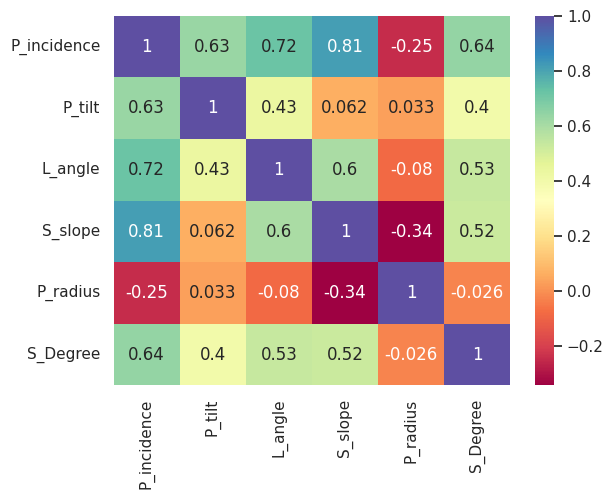

In [102]:
sns.heatmap(data.iloc[:,:6].corr(), annot=True, cmap='Spectral');

<hr>
A description of features and what they represent has not been provided. This makes it difficult to explain the correlation. The below is based only on the name of the feature. <br><br>
<b>Features with stronger Correlation</b>  
<li> Incidence has +ve correlation with Tilt (0.63), Angle (0.72), Slope (0.81) & Degree(0.64) & -ve correlation with Radius (-0.25)
<li> Tilt has +ve correlation with Incidence(0.63), Degree(0.4) & Angle(0.43)
<li> Angle has +ve correlation with Incidence(0.72), Tilt(0.43), Slope(0.6) & Degree(0.53)
<li> Slope has +ve correlation with Incidence(0.81), Angle(0.6) & Degree(0.52)
<li> Radius has -ve correlation with Incidence(-0.25), (-0.34)
<li> Degree has +ve correlation with Incidence(0.64), Tilt(0.4), Angle(0.53), Slope(0.52)
<br><br>
<b>Features with weaker Correlation</b>
<li> Tilt has +ve correlation with Slope (0.062) and Radius (0.033)
<li> Angle has -ve correlation with Radius (-0.08)
<li> Radius has -ve correlation with Angle (-0.08) and Degree (-0.026)
<hr>

<Figure size 1000x1400 with 0 Axes>

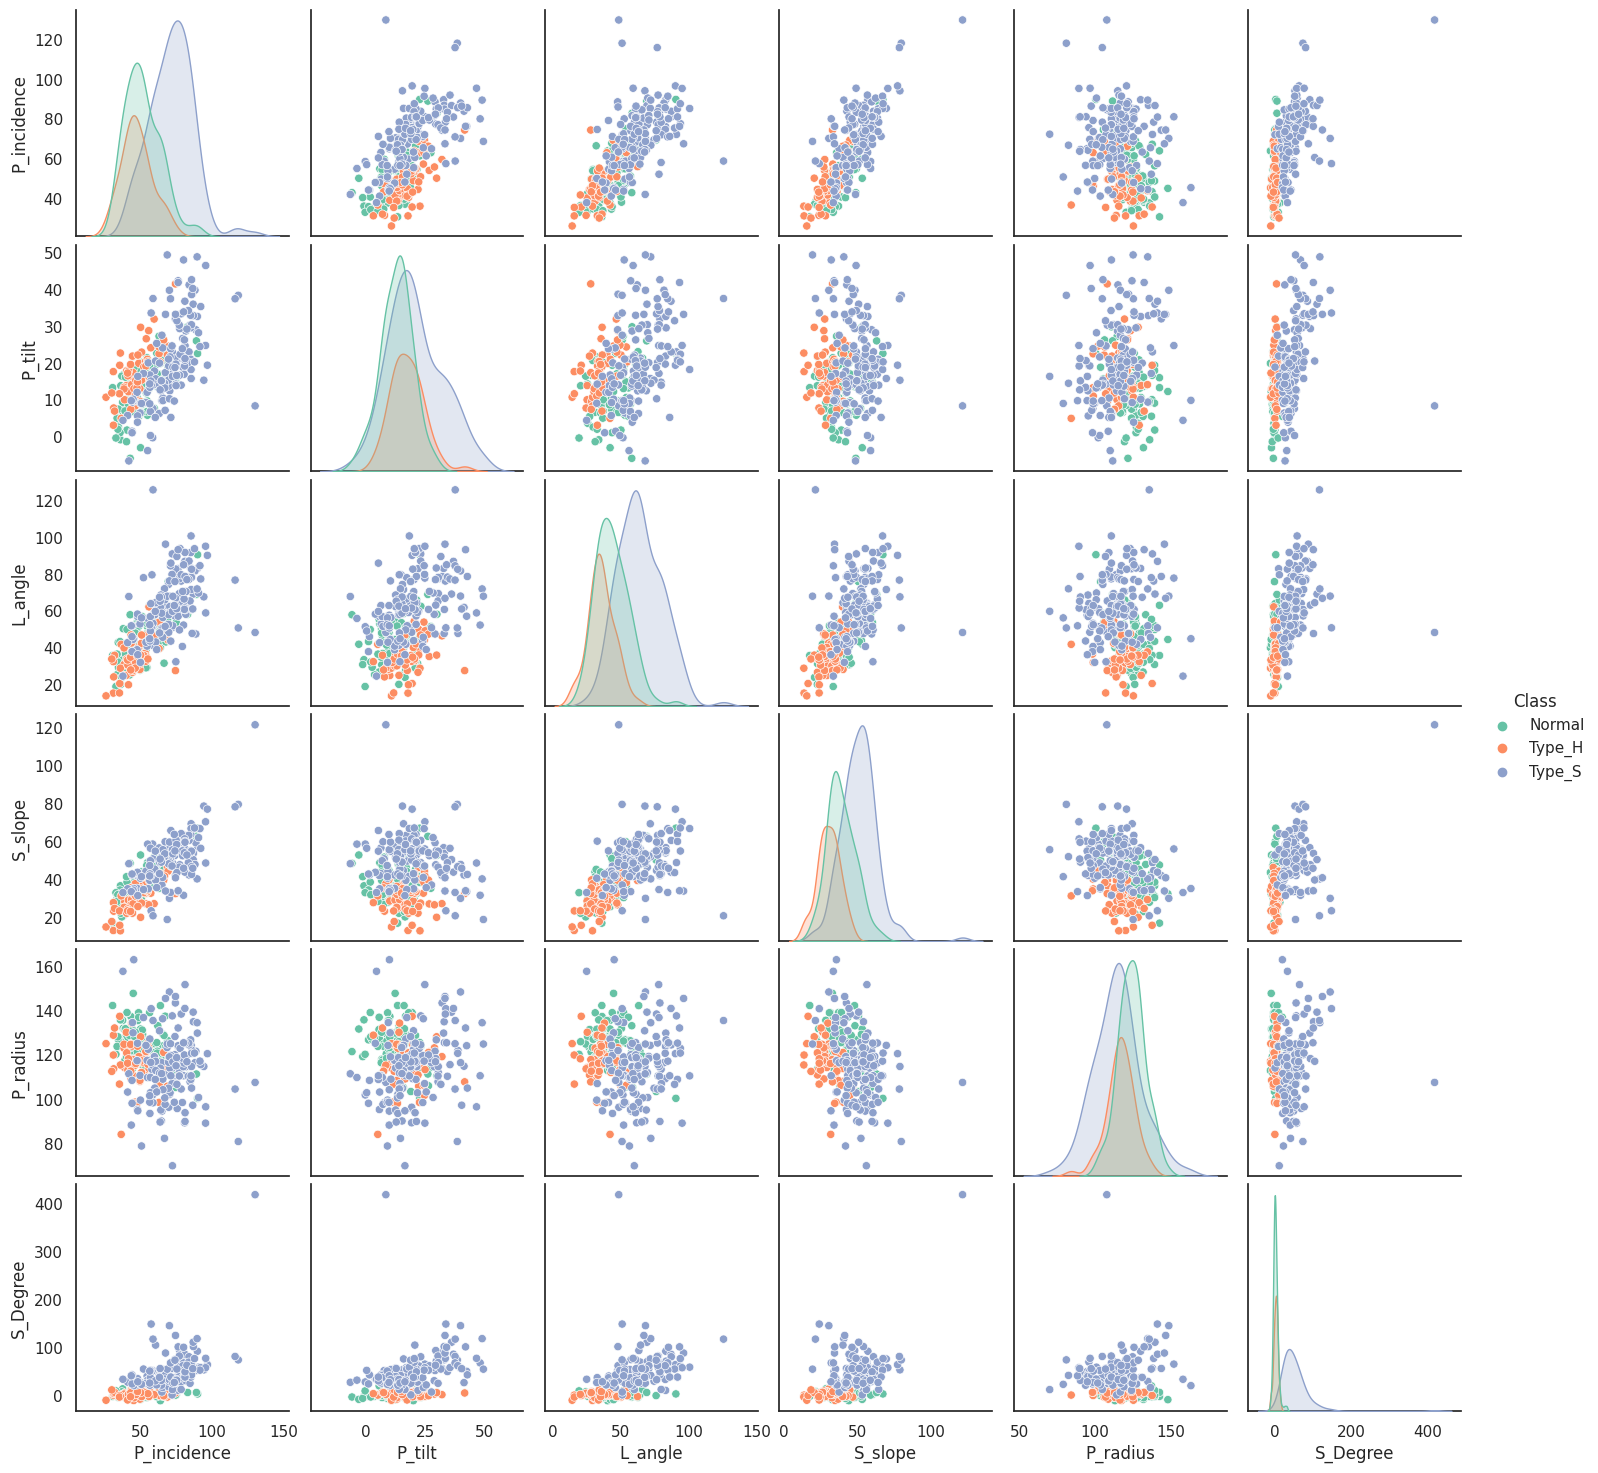

In [103]:
plt.figure(figsize=(10,14))
sns.pairplot(data, hue='Class')

<hr>
<br><br>

<hr>

<Figure size 800x400 with 0 Axes>

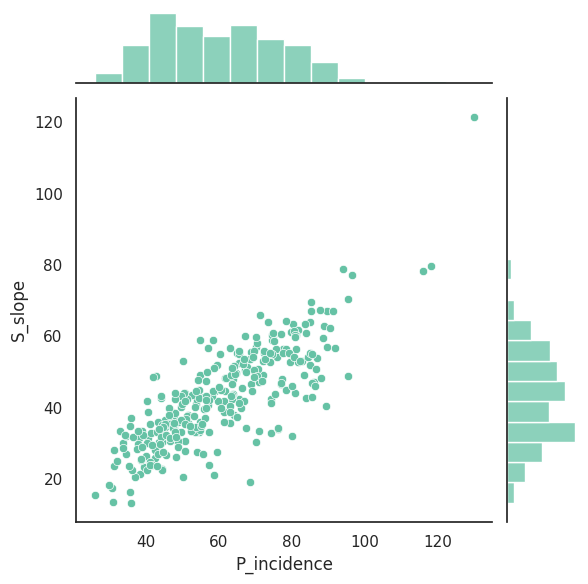

In [104]:
plt.figure(figsize=(8,4))
sns.set_theme(style="white", palette="Set2")
sns.jointplot(x=data.P_incidence, y=data.S_slope)

<hr>
<li> Incidence and Slope have a positive correlation 
<li> Both features have a normal distribution 
<li> A few outliers are leading to a right tail for both features
<li> These outliers should be removed for better analysis / fit and could skew the results
<hr>

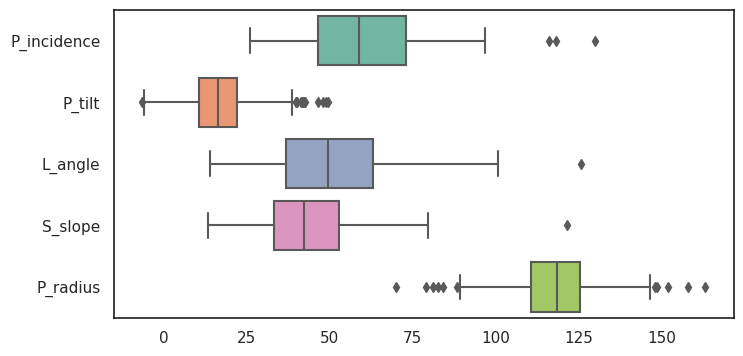

In [105]:
plt.figure(figsize=(8,4))
sns.set_theme(style="white", palette="Set2")
ax = sns.boxplot(data=data.iloc[:,:5], orient="h")

<Axes: >

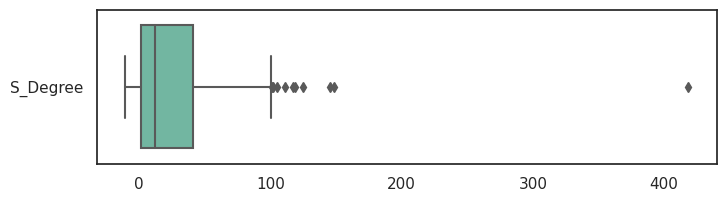

In [106]:
plt.figure(figsize=(8,2))
sns.boxplot(data=data.iloc[:,5:], orient="h")

<hr>
<li> Radius, Degree and Tilt features have many outliers 
<li> The median value of Degree is approx 10, however there are many outliers with values > 100 and one greater than 400. May skew the results

<hr>

**Section 4 : Model Building: [6 Marks]**
<li>A. Split data into X and Y. [1 Marks]
<li>B. Split data into train and test with 80:20 proportion. [1 Marks]
<li>C. Train a Supervised Learning Classification base model using KNN classifier. [2 Marks]
<li>D. Print all the possible performance metrics for both train and test data. [2 Marks]

<hr>

In [107]:
x = data.iloc[:,:6]
y = data.iloc[:,-1]

In [108]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8, random_state=42)

In [109]:
print(' x train : ',x_train.shape)
print(' y train : ',y_train.shape)
print(' x test  : ',x_test.shape)
print(' y test  : ',y_test.shape)

 x train :  (248, 6)
 y train :  (248,)
 x test  :  (62, 6)
 y test  :  (62,)


In [110]:
# Scale the features using StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [111]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [112]:
y_pred = knn.predict(x_test)

In [113]:
y_test = np.array(y_test)

In [114]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8064516129032258


In [115]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Normal       0.72      0.82      0.77        22
      Type_H       0.60      0.60      0.60        10
      Type_S       0.96      0.87      0.91        30

    accuracy                           0.81        62
   macro avg       0.76      0.76      0.76        62
weighted avg       0.82      0.81      0.81        62



<hr>

**Section 5 : Performance Improvement: [4 Marks]**
<li>A. Experiment with various parameters to improve performance of the base model. [2 Marks] <br>
&emsp;&emsp;(Optional: Experiment with various Hyperparameters - Research required)
<li>B. Clearly showcase improvement in performance achieved. [1 Marks] <br>
&emsp;&emsp;For Example:<br>
&emsp;&emsp;&emsp;A. Accuracy: +15% improvement <br>
&emsp;&emsp;&emsp;B. Precision: +10% improvement.
<li>C. Clearly state which parameters contributed most to improve model performance. [1 Marks]

<hr>

In [116]:
knnlist=[]
knnindex=0
for i in range(1,5) :
  for j in range(1,5) :
    knnlist.append(KNeighborsClassifier(n_neighbors=i, p=j))
    knnlist[knnindex].fit(x_train, y_train)
    knnindex += 1

In [117]:
y_predl=[]
acc=[]
for i in range(16):
  y_predl.append(knnlist[i].predict(x_test))
  acc.append(accuracy_score(y_predl[i], y_test))

In [118]:
neighbors=[]
p=[]
for i in range(1,5):
  for j in range(1,5):
    neighbors.append(i)
    p.append(j)

In [119]:
df = pd.DataFrame({"neighbors": neighbors, "p": p,"acc": acc})

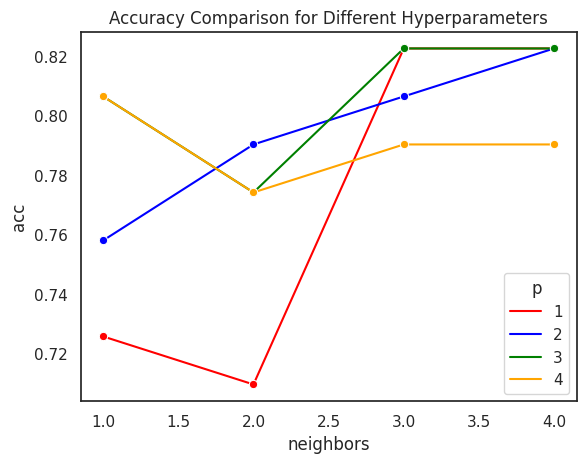

In [120]:
plt.title('Accuracy Comparison for Different Hyperparameters')
sns.lineplot(df, x=df.neighbors, y=df.acc, hue=df.p, palette=['red', 'blue', 'green', 'orange'], marker='o');

<hr>
<li> Based on the above, n_neighbors and p parameters impact the performance of the model
<li> For p=1, manhattan distance, increasing the n_neighbors to 3, brings the best the outcome
<li> For p=2, euclidean distance, the accuracy increases linearly with n_neigbors 
<li> The best parameter values are n_neighbors = 3, p=2 which give an 82% accuracy metric
<hr>

> **We can also use GridSearchCV for a wider hyper parameter search**

In [121]:
l = np.arange(1,50) # Leaf Size ( leaf_size   )
k = np.arange(1,10) # Neighbors ( n_neighbors )
p = np.arange(1,4)  # P(Manhattan - 1, Euclidean - 2) ( p )

hyp = {"leaf_size" : l, "n_neighbors" : k, "p" : p}
knntune = KNeighborsClassifier()
clf = GridSearchCV(knntune, hyp)
tunedmodel = clf.fit(x_train, y_train)

In [122]:
print('Best leaf_size:', tunedmodel.best_estimator_.get_params()['leaf_size'])
print('Best p:', tunedmodel.best_estimator_.get_params()['p'])
print('Best n_neighbors:', tunedmodel.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 2
Best n_neighbors: 5


In [123]:
results = pd.DataFrame(tunedmodel.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_leaf_size,param_n_neighbors,param_p,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001568,0.000330,0.004705,0.001150,1,1,1,"{'leaf_size': 1, 'n_neighbors': 1, 'p': 1}",0.76,0.72,0.82,0.775510,0.775510,0.770204,0.032126,491
1,0.001391,0.000161,0.003422,0.000673,1,1,2,"{'leaf_size': 1, 'n_neighbors': 1, 'p': 2}",0.80,0.72,0.80,0.836735,0.734694,0.778286,0.043947,295
2,0.001423,0.000489,0.003402,0.001031,1,1,3,"{'leaf_size': 1, 'n_neighbors': 1, 'p': 3}",0.74,0.72,0.76,0.836735,0.734694,0.758286,0.041265,1030
3,0.001370,0.000163,0.003345,0.000373,1,2,1,"{'leaf_size': 1, 'n_neighbors': 2, 'p': 1}",0.72,0.74,0.74,0.734694,0.775510,0.742041,0.018266,1226
4,0.001140,0.000038,0.002806,0.000133,1,2,2,"{'leaf_size': 1, 'n_neighbors': 2, 'p': 2}",0.76,0.74,0.76,0.795918,0.755102,0.762204,0.018384,883


In [124]:
knn2 = KNeighborsClassifier(n_neighbors=5, leaf_size=1, p=2)
knn2.fit(x_train, y_train)
y_pred2 = knn2.predict(x_test)
print(accuracy_score(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

0.8387096774193549
              precision    recall  f1-score   support

      Normal       0.79      0.86      0.83        22
      Type_H       0.70      0.70      0.70        10
      Type_S       0.93      0.87      0.90        30

    accuracy                           0.84        62
   macro avg       0.81      0.81      0.81        62
weighted avg       0.84      0.84      0.84        62



In [125]:
a1 = accuracy_score(y_test, y_pred)
a2 = accuracy_score(y_test, y_pred2)
p1 = precision_score(y_test, y_pred, average=None)
p2 = precision_score(y_test, y_pred2, average=None)

print('Accuracy overall improved by ', np.round((((a2-a1)/a1)*100),2), '%')
print('Precision for Normal patients improved by ', np.round((((p2[0]-p1[0])/p1[0])*100),2), '%')
print('Precision for Type H patients improved by ', np.round((((p2[1]-p1[1])/p1[1])*100),2), '%')
print('Precision for Type S patients reduced by ', np.round((((p2[2]-p1[2])/p1[2])*100),2), '%')

Accuracy overall improved by  4.0 %
Precision for Normal patients improved by  9.95 %
Precision for Type H patients improved by  16.67 %
Precision for Type S patients reduced by  -3.57 %


<hr>
<li> Based on Grid Search, the best parameters are n_neighbors=5, p=2 & leaf_size=2
<li> This is different from the earlier finding ( as i ran models for a limited set of parameter values ) 
<li> GridSearchCV is able to perform the check across a large set of values
<hr>


<hr>

### **Part B**

> **DOMAIN**: Banking, Marketing <br><br>
> **CONTEXT**: A bank X is on a massive digital transformation for all its departments. Bank has a growing customer base whee majority of them are liability customers (depositors) vs borrowers (asset customers). The bank is interested in expanding the borrowers base rapidly to bring in more business via loan interests. A campaign that the bank ran in last quarter showed an average single digit conversion rate. Digital transformation being the core strength of the business strategy, marketing department wants to devise effective campaigns with better target marketing to increase the conversion ratio to double digit with same budget as per last campaign. <br><br>
> **PROJECT OBJECTIVE**: Build a Machine Learning model to perform focused marketing by predicting the potential customers who will convert
using the historical dataset.


<hr>

**Section 1 : Data Understanding and Preparation: [5 Marks]**
<li>A. Read both the Datasets ‘Data1’ and ‘Data 2’ as DataFrame and store them into two separate variables. [1 Marks]
<li>B. Print shape and Column Names and DataTypes of both the Dataframes. [1 Marks]
<li>C. Merge both the Dataframes on ‘ID’ feature to form a single DataFrame [2 Marks]
<li>D. Change Datatype of below features to ‘Object’ [1 Marks]<br>
&emsp;&emsp;‘CreditCard’, ‘InternetBanking’, ‘FixedDepositAccount’, ‘Security’, ‘Level’, ‘HiddenScore’.<br><font color='gray'>
&emsp;&emsp;[Reason behind performing this operation:- Values in these features are binary i.e. 1/0. <br>
&emsp;&emsp;But DataType is ‘int’/’float’ which is not expected.]</font>

<hr>

In [126]:
data1 = pd.read_csv('/content/drive/MyDrive/datasets/sl/Part2+-+Data1.csv')
data2 = pd.read_csv('/content/drive/MyDrive/datasets/sl/Part2+-Data2.csv')

In [127]:
print('Data 1 File Shape:',data1.shape)
print('Data 2 File Shape:',data2.shape)

Data 1 File Shape: (5000, 8)
Data 2 File Shape: (5000, 7)


In [128]:
print(data1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 312.6 KB
None


In [129]:
print(data2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Mortgage             5000 non-null   int64  
 2   Security             5000 non-null   int64  
 3   FixedDepositAccount  5000 non-null   int64  
 4   InternetBanking      5000 non-null   int64  
 5   CreditCard           5000 non-null   int64  
 6   LoanOnCard           4980 non-null   float64
dtypes: float64(1), int64(6)
memory usage: 273.6 KB
None


In [130]:
bnkdata = pd.merge(data1, data2, on="ID")

In [131]:
bnkdata.shape

(5000, 14)

In [132]:
binary_cols = ['CreditCard', 'InternetBanking','FixedDepositAccount', 'Security', 'Level', 'HiddenScore', 'LoanOnCard']
for col in binary_cols:
  bnkdata[col] = bnkdata[col].astype('object')

bnkdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   object 
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   object 
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   object 
 10  FixedDepositAccount  5000 non-null   object 
 11  InternetBanking      5000 non-null   object 
 12  CreditCard           5000 non-null   object 
 13  LoanOnCard           4980 non-null   object 
dtypes: float64(1), int64(6), object(7)
memory usage: 585.9+ KB


<hr>

**Section 2 : Data Exploration and Analysis: [5 Marks]**
<li>A. Visualize distribution of Target variable ‘LoanOnCard’ and clearly share insights. [2 Marks]
<li>B. Check the percentage of missing values and impute if required. [1 Marks]
<li>C. Check for unexpected values in each categorical variable and impute with best suitable value. [2 Marks]<br>
&emsp;&emsp;<font color='gray'>[Unexpected values means if all values in a feature are 0/1 then ‘?’, ‘a’, 1.5 are unexpected values which needs treatment ]</font>
<hr>

<Axes: xlabel='LoanOnCard', ylabel='Count'>

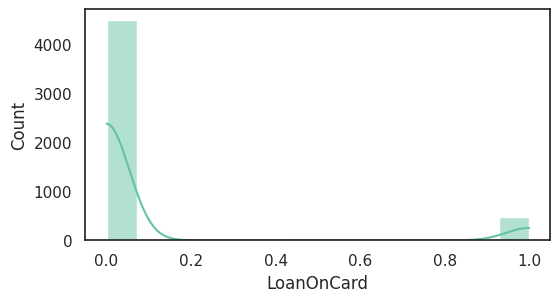

In [133]:
plt.figure(figsize=(6,3))
sns.histplot(bnkdata['LoanOnCard'], kde=True)

In [134]:
bnkdata['LoanOnCard'].value_counts(normalize=True)

0.0    0.903614
1.0    0.096386
Name: LoanOnCard, dtype: float64

<hr>
<li> The histplot above shows the distibution of target variable 
<li> The dataset is imbalanced and has 90% records with target variable 0
<li> Using this data as is can lead to biased results 
<hr>

In [135]:
(bnkdata.isnull().sum()/bnkdata.shape[0])*100

ID                     0.0
Age                    0.0
CustomerSince          0.0
HighestSpend           0.0
ZipCode                0.0
HiddenScore            0.0
MonthlyAverageSpend    0.0
Level                  0.0
Mortgage               0.0
Security               0.0
FixedDepositAccount    0.0
InternetBanking        0.0
CreditCard             0.0
LoanOnCard             0.4
dtype: float64

<hr>
<li> From the above table, only 0.4 % of data of 1 column (target) has null values
<li> This will not have significant impact on the overall model
<li> We can drop / delete these records before fitting to the model
<hr>

In [136]:
bnkdata = bnkdata.dropna(axis=0, subset=['LoanOnCard'])

In [137]:
bnkdata.shape

(4980, 14)

In [138]:
bnkdata['LoanOnCard'] = bnkdata['LoanOnCard'].astype('int')

<ipython-input-138-5345a9c44e76>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bnkdata['LoanOnCard'] = bnkdata['LoanOnCard'].astype('int')


In [139]:
for col in binary_cols :
  print(col,' : ', bnkdata[col].unique())

CreditCard  :  [0 1]
InternetBanking  :  [0 1]
FixedDepositAccount  :  [0 1]
Security  :  [0 1]
Level  :  [3 2 1]
HiddenScore  :  [1 4 3 2]
LoanOnCard  :  [1 0]


<hr>
<li> Categorical columns have unique values listed above
<li> There are no unexpected values, so impute is not required
<li> 'Customer Since' column has negative values which needs to be set to 0
<hr>

In [140]:
bnkdata.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,4980.0,2510.345382,1438.011129,10.0,1265.75,2510.5,3755.250,5000.0
Age,4980.0,45.352610,11.464212,23.0,35.00,45.0,55.000,67.0
CustomerSince,4980.0,20.117671,11.468716,-3.0,10.00,20.0,30.000,43.0
HighestSpend,4980.0,73.852410,46.070090,8.0,39.00,64.0,98.000,224.0
ZipCode,4980.0,93152.420482,2123.660073,9307.0,91911.00,93407.0,94608.000,96651.0
MonthlyAverageSpend,4980.0,1.939536,1.750006,0.0,0.70,1.5,2.525,10.0
Mortgage,4980.0,56.589759,101.836758,0.0,0.00,0.0,101.000,635.0
LoanOnCard,4980.0,0.096386,0.295149,0.0,0.00,0.0,0.000,1.0


In [141]:
bnkdata['CustomerSince'] = bnkdata['CustomerSince'].clip(lower=0)
bnkdata['CustomerSince'].min()

0

<hr>

**Section 3 : Data Preparation and model building: [10 Marks]**
<li>A. Split data into X and Y. [1 Marks]<br>
&emsp;&emsp;<font color='gray'>[Recommended to drop ID & ZipCode. LoanOnCard is target Variable]</font>
<li>B. Split data into train and test. Keep 25% data reserved for testing. [1 Marks]
<li>C. Train a Supervised Learning Classification base model - Logistic Regression. [2 Marks]
<li>D. Print evaluation metrics for the model and clearly share insights. [1 Marks]
<li>E. Balance the data using the right balancing technique. [2 Marks]<br>
&emsp;&emsp;i. Check distribution of the target variable<br>
&emsp;&emsp;ii. Say output is class A : 20% and class B : 80%<br>
&emsp;&emsp;iii. Here you need to balance the target variable as 50:50.<br>
&emsp;&emsp;iv. Try appropriate method to achieve the same.
<li>F. Again train the same previous model on balanced data. [1 Marks]
<li>G. Print evaluation metrics and clearly share differences observed. [2 Marks]
<hr>

In [142]:
bnkX = bnkdata.iloc[:,1:-1]
bnkX.drop(columns=['ZipCode'], inplace=True)
bnkY = bnkdata.iloc[:,-1]

In [143]:
bnkX.head(2)

,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard
9,34,9,180,1,8.9,3,0,0,0,0,0
10,65,39,105,4,2.4,3,0,0,0,0,0


In [144]:
bnkY.head(2)

9     1
10    0
Name: LoanOnCard, dtype: int64

In [145]:
x_train, x_test, y_train, y_test = train_test_split(bnkX, bnkY, train_size=0.75,random_state=42)

In [146]:
x_train.shape

(3735, 11)

In [147]:
from sklearn.linear_model import LogisticRegression
ss = StandardScaler()
x_train_std = ss.fit_transform(x_train)
x_test_std = ss.transform(x_test)
lr = LogisticRegression()

In [148]:
lr.fit(x_train_std, y_train)

LogisticRegression()

In [149]:
y_pred = lr.predict(x_test_std)
print(accuracy_score(y_test, y_pred))

0.9477911646586346


In [150]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1128
           1       0.78      0.62      0.69       117

    accuracy                           0.95      1245
   macro avg       0.87      0.80      0.83      1245
weighted avg       0.94      0.95      0.95      1245



<hr>
<li> The Logistic Regression model has a high accuracy of 95%
<li> However, when we look closely at the classification report<br>
&emsp;&emsp;It is doing a good job at predicting target value 0 ( all metrics are in high 90s )<br>
&emsp;&emsp;However, for target value 1, it is only predicting with 78% precision which is low<br>
<li> This is because target variable is not balanced 
<hr>

In [151]:
bnkY.value_counts(normalize=True)

0    0.903614
1    0.096386
Name: LoanOnCard, dtype: float64

<hr>
<li> The target variable LoanOnCard is not balanced 
<li> We can use class_weights in the LogisticRegression model to balance data
<li> This method penalizes the model more heavily if a minority class is misclassified
<hr>

In [154]:
# source : https://www.kdnuggets.com/2020/01/5-most-useful-techniques-handle-imbalanced-datasets.html#:~:text=The%205%20Most%20Useful%20Techniques%20to%20Handle%20Imbalanced,your%20Evaluation%20Metric%20...%205%205.%20Miscellaneous%20
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(bnkY), y=bnkY)
class_weights

array([0.55333333, 5.1875    ])

In [162]:
lr2 = LogisticRegression(class_weight='balanced')
lr2.fit(x_train_std, y_train)
y_pred2 = lr2.predict(x_test_std)
print(accuracy_score(y_test, y_pred2))
print(classification_report(y_test,y_pred2))

0.8835341365461847
              precision    recall  f1-score   support

           0       0.99      0.88      0.93      1128
           1       0.44      0.89      0.59       117

    accuracy                           0.88      1245
   macro avg       0.71      0.89      0.76      1245
weighted avg       0.94      0.88      0.90      1245



In [161]:
lr3 = LogisticRegression(class_weight={0:0.55333333, 1:5.1875})
lr3.fit(x_train_std, y_train)
y_pred3 = lr3.predict(x_test_std)
print(accuracy_score(y_test, y_pred3))
print(classification_report(y_test, y_pred3))

0.8819277108433735
              precision    recall  f1-score   support

           0       0.99      0.88      0.93      1128
           1       0.44      0.89      0.59       117

    accuracy                           0.88      1245
   macro avg       0.71      0.89      0.76      1245
weighted avg       0.94      0.88      0.90      1245



In [166]:
# Source : https://www.kdnuggets.com/2020/01/5-most-useful-techniques-handle-imbalanced-datasets.html#:~:text=The%205%20Most%20Useful%20Techniques%20to%20Handle%20Imbalanced,your%20Evaluation%20Metric%20...%205%205.%20Miscellaneous%20
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_sm, y_sm = smote.fit_resample(bnkX, bnkY)

In [167]:
y_sm.value_counts(normalize=True)

1    0.5
0    0.5
Name: LoanOnCard, dtype: float64

In [168]:
x_train_sm, x_test_sm, y_train_sm, y_test_sm = train_test_split(x_sm, y_sm, train_size=0.75,random_state=42)
x_train_sm_std = ss.fit_transform(x_train_sm)
x_test_sm_std = ss.transform(x_test_sm)

In [170]:
lr4 = LogisticRegression()
lr4.fit(x_train_sm_std, y_train_sm)
y_pred4 = lr3.predict(x_test_sm_std)
print(accuracy_score(y_test_sm, y_pred4))
print(classification_report(y_test_sm, y_pred4))

0.7542222222222222
              precision    recall  f1-score   support

           0       0.67      0.99      0.80      1113
           1       0.99      0.52      0.68      1137

    accuracy                           0.75      2250
   macro avg       0.83      0.76      0.74      2250
weighted avg       0.83      0.75      0.74      2250



<hr>
<li> Tried different methods of balancing the data 
<li> For loans, precision is a key metric as we would like to avoid loan defaults after approving
<li> Original Model : Precision is 96 for 0, 78 for 1 
<li> Class Weights Model : Precision is 99 for 0, 44 for 1 ( performed worse )
<li> SMOTE Model : Precision is 67 for 0, 99 for 1 ( peformed better for 1 ), but not so dropped performance for 0 
<li> SMOTE model may work better for as we are more concerned not approving loans for people who will default
<hr>

<hr>

**Section 4 : Performance Improvement: [10 Marks]**
<li>A. Train a base model each for SVM, KNN. [4 Marks]
<li>B. Tune parameters for each of the models wherever required and finalize a model. [3 Marks]<br>
&emsp;&emsp;<font color='gray'>(Optional: Experiment with various Hyperparameters - Research required)</font>
<li>C. Print evaluation metrics for final model. [1 Marks]
<li>D. Share improvement achieved from base model to final model. [2 Marks]

<hr>

In [173]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [174]:
svc = SVC()
svc.fit(x_train_std, y_train)
y_pred_svc = svc.predict(x_test_std)
print(accuracy_score(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))

0.97429718875502
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1128
           1       0.95      0.77      0.85       117

    accuracy                           0.97      1245
   macro avg       0.96      0.88      0.92      1245
weighted avg       0.97      0.97      0.97      1245



In [176]:
svc1 = SVC(C=0.1)
svc1.fit(x_train_std, y_train)
y_pred_svc1 = svc1.predict(x_test_std)
print(accuracy_score(y_test, y_pred_svc1))
print(classification_report(y_test, y_pred_svc1))

0.944578313253012
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1128
           1       0.96      0.43      0.59       117

    accuracy                           0.94      1245
   macro avg       0.95      0.71      0.78      1245
weighted avg       0.95      0.94      0.93      1245



In [177]:
svc2 = SVC(C=10)
svc2.fit(x_train_std, y_train)
y_pred_svc2 = svc2.predict(x_test_std)
print(accuracy_score(y_test, y_pred_svc2))
print(classification_report(y_test, y_pred_svc2))

0.9751004016064257
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1128
           1       0.88      0.85      0.86       117

    accuracy                           0.98      1245
   macro avg       0.93      0.92      0.93      1245
weighted avg       0.97      0.98      0.97      1245



In [178]:
svc3 = SVC(gamma=0.1)
svc3.fit(x_train_std, y_train)
y_pred_svc3 = svc3.predict(x_test_std)
print(accuracy_score(y_test, y_pred_svc3))
print(classification_report(y_test, y_pred_svc3))

0.97429718875502
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1128
           1       0.95      0.77      0.85       117

    accuracy                           0.97      1245
   macro avg       0.96      0.88      0.92      1245
weighted avg       0.97      0.97      0.97      1245



In [179]:
svc4 = SVC(gamma=0.01)
svc4.fit(x_train_std, y_train)
y_pred_svc4 = svc4.predict(x_test_std)
print(accuracy_score(y_test, y_pred_svc4))
print(classification_report(y_test, y_pred_svc4))

0.9590361445783132
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1128
           1       0.95      0.60      0.73       117

    accuracy                           0.96      1245
   macro avg       0.95      0.80      0.86      1245
weighted avg       0.96      0.96      0.95      1245



<hr>
<li> Ran 4 models of SVC with different values for C & Gamma 
<li> The best accuracy (97.51) was from the model (svc2) with C=10, Gamma - Default (Scale)
<li> However, the base model had the best values for precision for both 0 & 1 along with an accuracy (97.42) that was close to svc2 
<li> Base model for SVC (svc above) is the best SVC model
<hr>

In [175]:
knnb = KNeighborsClassifier()
knnb.fit(x_train_std, y_train)
y_pred_svc = knnb.predict(x_test_std)
print(accuracy_score(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))

0.9582329317269076
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1128
           1       0.93      0.60      0.73       117

    accuracy                           0.96      1245
   macro avg       0.95      0.80      0.85      1245
weighted avg       0.96      0.96      0.95      1245



In [180]:
knnb1 = KNeighborsClassifier(n_neighbors=3)
knnb1.fit(x_train_std, y_train)
y_pred_knnb1 = knnb1.predict(x_test_std)
print(accuracy_score(y_test, y_pred_knnb1))
print(classification_report(y_test, y_pred_knnb1))

0.9646586345381526
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1128
           1       0.93      0.68      0.78       117

    accuracy                           0.96      1245
   macro avg       0.95      0.83      0.88      1245
weighted avg       0.96      0.96      0.96      1245



In [181]:
knnb2 = KNeighborsClassifier(n_neighbors=4)
knnb2.fit(x_train_std, y_train)
y_pred_knnb2 = knnb2.predict(x_test_std)
print(accuracy_score(y_test, y_pred_knnb2))
print(classification_report(y_test, y_pred_knnb2))

0.9550200803212852
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1128
           1       0.94      0.56      0.70       117

    accuracy                           0.96      1245
   macro avg       0.95      0.78      0.84      1245
weighted avg       0.95      0.96      0.95      1245



In [182]:
knnb3 = KNeighborsClassifier(n_neighbors=5)
knnb3.fit(x_train_std, y_train)
y_pred_knnb3 = knnb3.predict(x_test_std)
print(accuracy_score(y_test, y_pred_knnb3))
print(classification_report(y_test, y_pred_knnb3))

0.9582329317269076
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1128
           1       0.93      0.60      0.73       117

    accuracy                           0.96      1245
   macro avg       0.95      0.80      0.85      1245
weighted avg       0.96      0.96      0.95      1245



In [183]:
knnb4 = KNeighborsClassifier(n_neighbors=3, p=3)
knnb4.fit(x_train_std, y_train)
y_pred_knnb4 = knnb4.predict(x_test_std)
print(accuracy_score(y_test, y_pred_knnb4))
print(classification_report(y_test, y_pred_knnb4))

0.9654618473895582
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1128
           1       0.94      0.68      0.79       117

    accuracy                           0.97      1245
   macro avg       0.95      0.84      0.88      1245
weighted avg       0.96      0.97      0.96      1245



<hr>
<li> Ran 4 models of KNN with different values for C & Gamma 
<li> The best accuracy (96.54) was from the model (knnb4) with n_neighbors=3, p=3
<li> This model also has the highest values of precision for both classes
<li> knnb4 is best KNN model
<hr>

> Overall, the base SVC model is the best model for this data set and does a good job at predicting both classes. Using SMOTE provided a good way to improve accuracy of prediction for the minority ('1') class 

> A combination of using SMOTE and running the data through the SVC model will give the best model to be used for this dataset 